In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading CSV file into training set
training_set = pd.read_csv('TSLA.csv')
training_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


In [9]:
# Reading CSV file into test set
test_set = pd.read_csv('TSLA.csv')
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


In [10]:
# Getting relevant feature
training_set = training_set.iloc[:,1:2]
training_set.head()

,Open
0,5.788
1,5.642
2,5.552
3,5.440
4,5.400


In [11]:
# Converting to 2D array
training_set = training_set.values
training_set

array([[ 5.788   ],
       [ 5.642   ],
       [ 5.552   ],
       ...,
       [63.459999],
       [61.712002],
       [61.088001]])

In [12]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set

array([[0.00644319],
       [0.00441581],
       [0.00316605],
       ...,
       [0.80728749],
       [0.78301447],
       [0.77434948]])

In [13]:
# Getting the inputs and the ouputs
X_train = training_set[0:1257]
y_train = training_set[1:1258]

# Example
today = pd.DataFrame(X_train[0:5])
tomorrow = pd.DataFrame(y_train[0:5])
ex = pd.concat([today, tomorrow], axis=1)
ex.columns = (['today', 'tomorrow'])
ex

,today,tomorrow
0,0.006443,0.004416
1,0.004416,0.003166
2,0.003166,0.001611
3,0.001611,0.001055
4,0.001055,0.002277


In [14]:
# Reshaping into required shape for Keras
X_train = np.reshape(X_train, (1257, 1, 1))
X_train

array([[[0.00644319]],

       [[0.00441581]],

       [[0.00316605]],

       ...,

       [[0.52284283]],

       [[0.54131143]],

       [[0.53306307]]])

In [27]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [28]:
# Initializing the Recurrent Neural Network
regressor = Sequential()

In [29]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

In [30]:
# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the Recurrent Neural Network
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the Recurrent Neural Network to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 3s 2ms/step - loss: 0.1325
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0871
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0527
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0485
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0459
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0451
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0442
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0433
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0424
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0415
Epoch 13/200
40/40 [=================

In [31]:
# Getting the real stock price of 2017
test_set = pd.read_csv('TSLA.csv')
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


In [32]:
# Getting relevant feature
real_stock_price = test_set.iloc[:,1:2]
real_stock_price.head()

,Open
0,5.788
1,5.642
2,5.552
3,5.440
4,5.400


In [33]:
# Converting to 2D array
real_stock_price = real_stock_price.values

In [36]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (1490, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

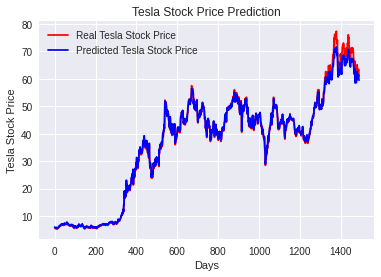

In [37]:
# Visualizing the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

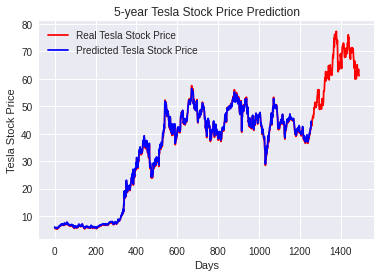

In [39]:
# Getting the real stock price of 2012 - 2016
real_stock_price_train = pd.read_csv('TSLA.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2012 - 2016
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('5-year Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

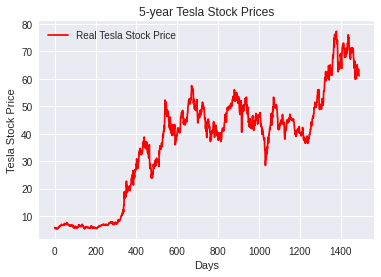

In [41]:
plt.plot(real_stock_price_train, color = 'red', label = 'Real Tesla Stock Price')
plt.title('5-year Tesla Stock Prices')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

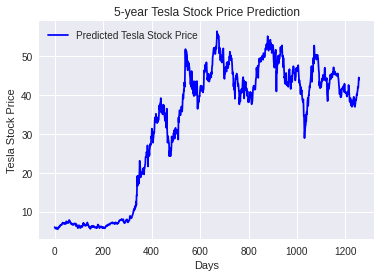

In [42]:
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('5-year Tesla Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()